In [1]:
# Instale as bibliotecas necessárias
!pip install pandas -q
!pip install matplotlib -q
!pip install seaborn -q
!pip install db-sqlite3 -q
!pip install SQLAlchemy -q
!pip install requests -q
!pip install ujson -q
!pip install folium


In [2]:
import pandas as pd
import numpy as np
import folium


In [3]:
df_janeiro = pd.read_csv('./dados/focos_mensal_br_202401.csv')
df_fevereiro = pd.read_csv('./dados/focos_mensal_br_202402.csv')
df_marco = pd.read_csv('./dados/focos_mensal_br_202403.csv')
df_abril = pd.read_csv('./dados/focos_mensal_br_202404.csv')
df_maio = pd.read_csv('./dados/focos_mensal_br_202405.csv')
df_junho = pd.read_csv('./dados/focos_mensal_br_202406.csv')

# Setando o caminho dos arquivos a serem concatenados
path = 'dados/focos_mensal_br_2024'

# Concatenar arquivos csv
df_brasil_2024 = pd.concat([pd.read_csv(f"{path}{mes:02}.csv") for mes in range(1, 7)])

# Exibir a tabela concatenada
df_brasil_2024


,id,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp
0,966ed445-fa70-3369-9802-3e74c5765684,-12.5667,-41.4364,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,8,1.38,0.70,Caatinga,76.5
1,0669c14d-7a39-3d98-9f20-23e118fbcf09,-12.5662,-41.4611,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,9,1.73,0.83,Caatinga,81.4
2,53a46800-fa40-3323-9b20-05108d435c24,-18.0629,-57.3721,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,14.42,0.00,Pantanal,59.8
3,d0af560b-c440-3554-a5c6-83fb055304e8,-18.0823,-57.3902,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,63.4
4,b509b339-729d-3a30-a7d9-8a6a33398a4f,-18.0823,-57.3902,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,64.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353038,feb4f53b-e202-350c-8f74-7f82fc40cb1d,-19.6805,-57.0351,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,62,0.00,0.84,Pantanal,106.4
353039,7fcb2a72-dd94-33e5-b249-69de261a3faf,-19.6801,-57.0561,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.94,Pantanal,60.7
353040,7d66733d-24fd-3205-967d-17dc67e60fd2,-20.0190,-42.8786,2024-06-30 23:36:57,GOES-16,SÃO DOMINGOS DO PRATA,MINAS GERAIS,Brasil,3161007,31,33,88,0.00,1.00,Mata Atlântica,86.7
353041,defe4e3a-b07b-30a1-9a9c-9e3403ab2967,-19.6604,-57.0379,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.89,Pantanal,68.3


In [4]:
# Exibir quantidade de linhas e colunas
df_brasil_2024.shape

# Exibir estatísticas descritivas
df_brasil_2024.describe()


,lat,lon,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,frp
count,983232.000000,983232.000000,9.832320e+05,983232.000000,983232.0,983232.000000,983232.000000,983232.000000,951407.000000
mean,-9.993129,-53.809391,3.189780e+06,31.827838,33.0,9.495614,0.690434,-21.650540,33.780956
std,8.596091,6.936608,1.611532e+06,16.108001,0.0,104.052397,3.708917,147.580664,57.590815
min,-33.715350,-73.666210,1.100015e+06,11.000000,33.0,-999.000000,0.000000,-999.000000,0.000000
25%,-17.497535,-60.026930,1.400472e+06,14.000000,33.0,5.000000,0.000000,0.210000,3.800000
50%,-11.185035,-56.279550,2.922250e+06,29.000000,33.0,14.000000,0.000000,0.770000,9.400000
75%,-2.304890,-48.093350,5.006903e+06,50.000000,33.0,29.000000,0.000000,1.000000,54.200000
max,5.163930,-34.809400,5.300108e+06,53.000000,33.0,93.000000,252.980000,1.000000,4720.700000


In [5]:
# Exibir nomes das colunas
df_brasil_2024.columns

# Renomear colunas
df_brasil_2024.rename(columns={'lat': 'latitude', 'lon': 'longitude'}, inplace=True)


In [6]:
# Verificar valores nulos
df_brasil_2024.isnull().sum()

# Preencher valores nulos
df_brasil_2024.fillna('Desconhecido', inplace=True)

# Remover espaços em branco dos nomes das colunas
df_brasil_2024.columns = df_brasil_2024.columns.str.strip()

# Remover espaços em branco dos dados das células
df_brasil_2024 = df_brasil_2024.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Exibir o dataframe após tratamento
df_brasil_2024


/var/folders/tz/m1hj054163dbmxvg0q4t0fk80000gp/T/ipykernel_40254/2255384891.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Desconhecido' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_brasil_2024.fillna('Desconhecido', inplace=True)


,id,latitude,longitude,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp
0,966ed445-fa70-3369-9802-3e74c5765684,-12.5667,-41.4364,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,8,1.38,0.70,Caatinga,NaN
1,0669c14d-7a39-3d98-9f20-23e118fbcf09,-12.5662,-41.4611,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,9,1.73,0.83,Caatinga,NaN
2,53a46800-fa40-3323-9b20-05108d435c24,-18.0629,-57.3721,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,14.42,0.00,Pantanal,NaN
3,d0af560b-c440-3554-a5c6-83fb055304e8,-18.0823,-57.3902,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,NaN
4,b509b339-729d-3a30-a7d9-8a6a33398a4f,-18.0823,-57.3902,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353038,feb4f53b-e202-350c-8f74-7f82fc40cb1d,-19.6805,-57.0351,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,62,0.00,0.84,Pantanal,NaN
353039,7fcb2a72-dd94-33e5-b249-69de261a3faf,-19.6801,-57.0561,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.94,Pantanal,NaN
353040,7d66733d-24fd-3205-967d-17dc67e60fd2,-20.0190,-42.8786,2024-06-30 23:36:57,GOES-16,SÃO DOMINGOS DO PRATA,MINAS GERAIS,Brasil,3161007,31,33,88,0.00,1.00,Mata Atlântica,NaN
353041,defe4e3a-b07b-30a1-9a9c-9e3403ab2967,-19.6604,-57.0379,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.89,Pantanal,NaN


In [7]:
# Remover colunas desnecessárias
df_brasil_2024.drop(['frp', 'id', 'pais', 'municipio_id', 'estado_id', 'pais_id'], axis=1, inplace=True)

# Remover valores indesejados da coluna 'risco_fogo'
df_brasil_2024.query('risco_fogo != -999', inplace=True)

# Exibir o dataframe atualizado
df_brasil_2024


,latitude,longitude,data_hora_gmt,satelite,municipio,estado,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma
0,-12.566700,-41.436400,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,8,1.38,0.70,Caatinga
1,-12.566200,-41.461100,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,9,1.73,0.83,Caatinga
2,-18.062900,-57.372100,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,0,14.42,0.00,Pantanal
5,-18.062900,-57.372100,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,0,14.42,0.00,Pantanal
6,-16.157301,-39.203999,2024-01-01 00:17:05,METOP-B,SANTA CRUZ CABRÁLIA,BAHIA,0,0.00,0.22,Mata Atlântica
...,...,...,...,...,...,...,...,...,...,...
353038,-19.680500,-57.035100,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,62,0.00,0.84,Pantanal
353039,-19.680100,-57.056100,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,60,0.00,0.94,Pantanal
353040,-20.019000,-42.878600,2024-06-30 23:36:57,GOES-16,SÃO DOMINGOS DO PRATA,MINAS GERAIS,88,0.00,1.00,Mata Atlântica
353041,-19.660400,-57.037900,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,60,0.00,0.89,Pantanal


In [8]:
# Ordenar por risco de fogo
Risk_of_Fire = df_brasil_2024.sort_values(by='risco_fogo', ascending=False)

# Selecionar os 25 maiores riscos
new_set = Risk_of_Fire.head(25)

# Transformar valores para listas
coordenadas_fogo = new_set[['latitude', 'longitude']].values.tolist()
municipios = new_set[['municipio']].values.tolist()

# Exibir os primeiros 4 resultados
print(coordenadas_fogo[0:4])
print(municipios[0:4])

# Criar o mapa usando Folium
F_Mapa = folium.Map([-15.797515, -47.891887], zoom_start=5, control_scale=True)

# Adicionar marcadores ao mapa
for i in range(len(coordenadas_fogo)):
    pontos = coordenadas_fogo[i]
    cid = municipios[i]
    folium.Marker(pontos, popup=cid).add_to(F_Mapa)

# Exibir o mapa
F_Mapa


[[-14.6424, -45.0794], [2.538, -61.49197], [2.86865, -60.74482], [3.96805, -61.31206]]
[['COCOS'], ['MUCAJAÍ'], ['BOA VISTA'], ['AMAJARI']]


In [9]:
# Ordenar por precipitação
precipitation_set = df_brasil_2024.sort_values(by='precipitacao', ascending=False)

# Selecionar os 25 maiores valores de precipitação
p_new_set = precipitation_set.head(25)

# Transformar valores para listas
coordenadas_agua = p_new_set[['latitude', 'longitude']].values.tolist()
municipios = p_new_set[['municipio']].values.tolist()
chuva = p_new_set[['precipitacao']].values.tolist()

# Exibir os primeiros 4 resultados
print(coordenadas_agua[0:4])
print(municipios[0:4])
print(chuva[0:4])

# Criar o mapa usando Folium
P_Mapa = folium.Map([-15.797515, -47.891887], zoom_start=5, control_scale=True)

# Adicionar marcadores ao mapa
for i in range(len(coordenadas_agua)):
    pontos = coordenadas_agua[i]
    cid = municipios[i]
    agua = chuva[i]
    folium.Marker(pontos, popup=(cid, agua)).add_to(P_Mapa)

# Exibir o mapa
P_Mapa


[[-29.50417, -52.48787], [-28.55103, -55.36242], [0.3826, -60.5695], [0.3806, -60.578098]]
[['SINIMBU'], ['SANTO ANTÔNIO DAS MISSÕES'], ['RORAINÓPOLIS'], ['RORAINÓPOLIS']]
[[252.98], [230.9], [157.24], [156.32]]


In [10]:
!pip install matplotlib seaborn


DataFrame de Comparação:              municipio  numero_dias_sem_chuva  precipitacao  risco_fogo
0      ABADIA DE GOIÁS                    993         86.76    0.861935
1  ABADIA DOS DOURADOS                    296          1.66    0.776667
2            ABADIÂNIA                   1812          1.02    0.863061
3           ABAETETUBA                  -2902         96.68    0.000000
4               ABAETÉ                   1245         37.83    0.619565


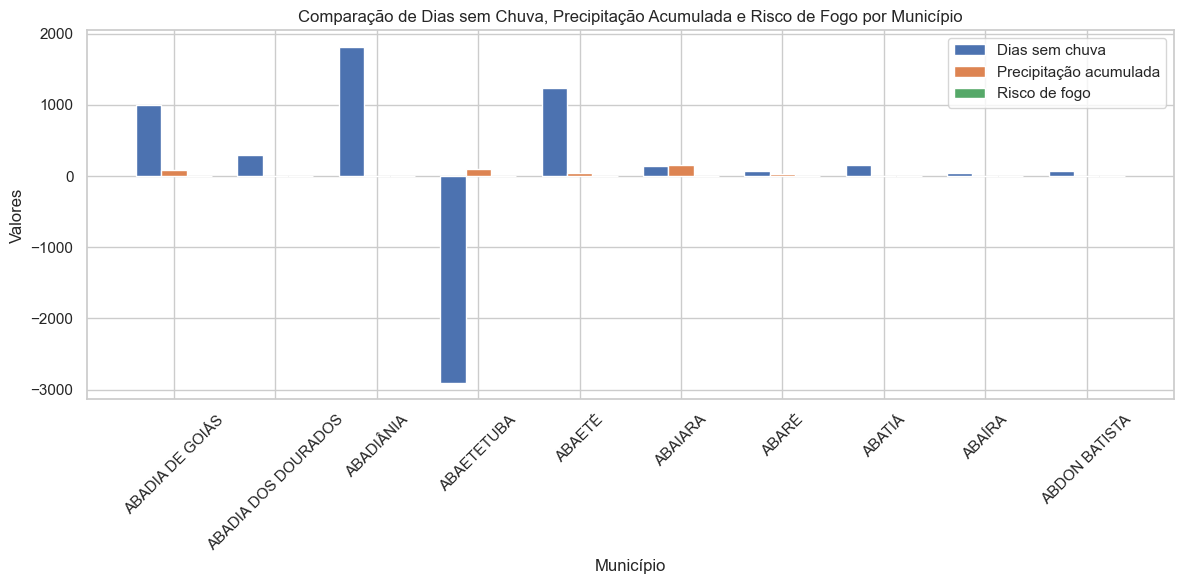


Esse gráfico de barras compara três variáveis-chave relacionadas a condições climáticas e risco de fogo para os municípios analisados:

1. Dias sem Chuva: A barra azul representa o número acumulado de dias sem chuva para cada município. Um valor alto aqui indica que o município está enfrentando condições secas prolongadas, o que pode contribuir para o aumento do risco de incêndios florestais.

2. Precipitação Acumulada: A barra laranja mostra a quantidade total de precipitação registrada no período. Municípios com valores baixos de precipitação são mais propensos a condições de seca, enquanto os que têm mais chuva podem estar mais protegidos contra incêndios.

3. Risco de Fogo: A barra verde reflete a média do risco de fogo calculada para cada município. Municípios com altos índices de risco de fogo podem necessitar de maior atenção para a prevenção de queimadas.

Comparando esses três indicadores, é possível identificar as regiões mais vulneráveis a incêndios. Por exemplo, municípios

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar o estilo do Seaborn
sns.set(style='whitegrid')

# Agrupar os dados por município
df_comparativo = df_brasil_2024.groupby('municipio').agg({
    'numero_dias_sem_chuva': 'sum',  # Somar os dias sem chuva
    'precipitacao': 'sum',           # Somar a precipitação acumulada
    'risco_fogo': 'mean'             # Calcular a média do risco de fogo
}).reset_index()

# Verificar o DataFrame resultante
print("DataFrame de Comparação:", df_comparativo.head())

# Definir o número de municípios a serem exibidos
n_municipios = min(10, len(df_comparativo))

# Criar uma nova figura
plt.figure(figsize=(12, 6))

# Criar gráfico de barras
bar_width = 0.25
index = np.arange(n_municipios)

# Barras para dias sem chuva
plt.bar(index, df_comparativo['numero_dias_sem_chuva'].head(n_municipios), bar_width, label='Dias sem chuva')

# Barras para precipitação acumulada
plt.bar(index + bar_width, df_comparativo['precipitacao'].head(n_municipios), bar_width, label='Precipitação acumulada')

# Barras para risco de fogo
plt.bar(index + 2 * bar_width, df_comparativo['risco_fogo'].head(n_municipios), bar_width, label='Risco de fogo')

# Adicionar título e rótulos
plt.title('Comparação de Dias sem Chuva, Precipitação Acumulada e Risco de Fogo por Município')
plt.xlabel('Município')
plt.ylabel('Valores')
plt.xticks(index + bar_width, df_comparativo['municipio'].head(n_municipios), rotation=45)
plt.legend()

# Exibir gráfico
plt.tight_layout()
plt.show()

# Explicação dos resultados
explicacao = """
Esse gráfico de barras compara três variáveis-chave relacionadas a condições climáticas e risco de fogo para os municípios analisados:

1. Dias sem Chuva: A barra azul representa o número acumulado de dias sem chuva para cada município. Um valor alto aqui indica que o município está enfrentando condições secas prolongadas, o que pode contribuir para o aumento do risco de incêndios florestais.

2. Precipitação Acumulada: A barra laranja mostra a quantidade total de precipitação registrada no período. Municípios com valores baixos de precipitação são mais propensos a condições de seca, enquanto os que têm mais chuva podem estar mais protegidos contra incêndios.

3. Risco de Fogo: A barra verde reflete a média do risco de fogo calculada para cada município. Municípios com altos índices de risco de fogo podem necessitar de maior atenção para a prevenção de queimadas.

Comparando esses três indicadores, é possível identificar as regiões mais vulneráveis a incêndios. Por exemplo, municípios que combinam muitos dias sem chuva com baixo acúmulo de precipitação e um alto risco de fogo são mais suscetíveis a queimadas.

Essa análise ajuda a direcionar políticas de prevenção de incêndios e a alocar recursos para combate em áreas críticas.
"""
print(explicacao)


